In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import pearsonr


# Import Data

In [2]:
life_expectancy = pd.read_csv('all_data.csv')

In [3]:
print(life_expectancy.head(), life_expectancy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 None


# Exploratory Analysis

In [4]:
# Extracting, columns, countries, and years to lists

columns_list = life_expectancy.columns.tolist()
unique_countries = life_expectancy['Country'].unique().tolist()
print(unique_countries)
years = life_expectancy['Year'].unique().tolist()
print(years)


['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


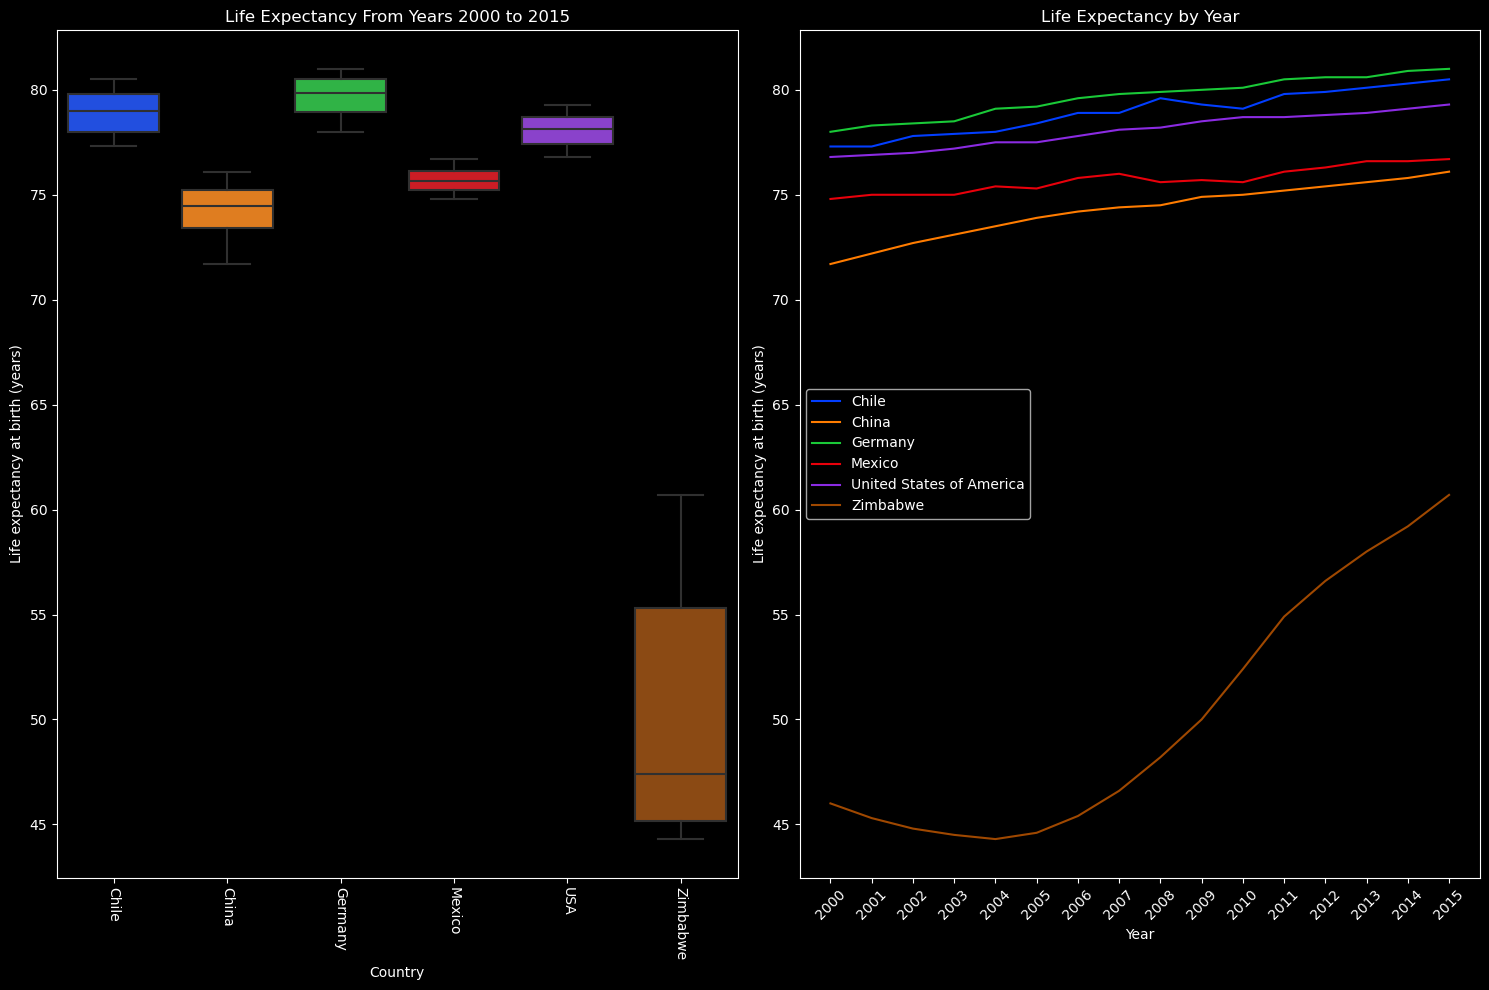

<Figure size 640x480 with 0 Axes>

In [5]:
# Set palette
sns.set_palette("bright")

plt.figure(figsize=(15,10))

# Replace "United States of America" with "USA" for easier viewing on xticklabels
countries_list_for_axis = life_expectancy['Country'].unique().tolist()
countries_list_for_axis[4] = 'USA'

# Box plots of country data
plt.subplot(1,2,1)

ax = sns.boxplot(x= 'Country', y= 'Life expectancy at birth (years)', data= life_expectancy)
ax.set_xticklabels(countries_list_for_axis, rotation=270)
plt.title('Life Expectancy From Years 2000 to 2015')

# Line graphs of life expectancy by year by country
plt.subplot(1,2,2)

ax = sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', hue= 'Country', data = life_expectancy)
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(loc=6)
plt.title('Life Expectancy by Year')

plt.tight_layout()
plt.show()
plt.clf()

# reset unique_countries list
unique_countries = life_expectancy['Country'].unique().tolist()


In [6]:
# Experimenting with why Zimbabwe's data looked like it was zero. This is because their GDP is much lower

# Create x-axis range based on range of data

# min_gdp = min(life_expectancy['GDP'])
# max_gdp = max(life_expectancy['GDP'])
# # x_axis = []
# # interval = (max_gdp - min_gdp) / 10  # Divide the range into 10 intervals
                                             
# # for i in range(11):
# #     if i == 0:
# #         x_axis.append(min_gdp)
# #     else:
# #         x_axis.append(min_gdp + i * interval) 

# # Set palette
# sns.set_palette("bright")

# # Create graph
# plt.figure(figsize=(8,6))
# ax = sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', hue= 'Country', data = life_expectancy)
# # ax.set_xticks(x_axis)
# # ax.set_xticklabels(x_axis, rotation = 45)

# # # Create a ScalarFormatter
# # formatter = ticker.ScalarFormatter(useMathText=True)
# # formatter.set_scientific(True)
# # formatter.set_powerlimits((-3, 3))  # Adjust the power limits if needed

# # # Apply the formatter to the x-axis tick labels
# # plt.gca().xaxis.set_major_formatter(formatter)

# plt.legend(loc=4)
# plt.title('Life Expectancy vs. GDP')

# plt.tight_layout()
# plt.show()
# plt.clf()

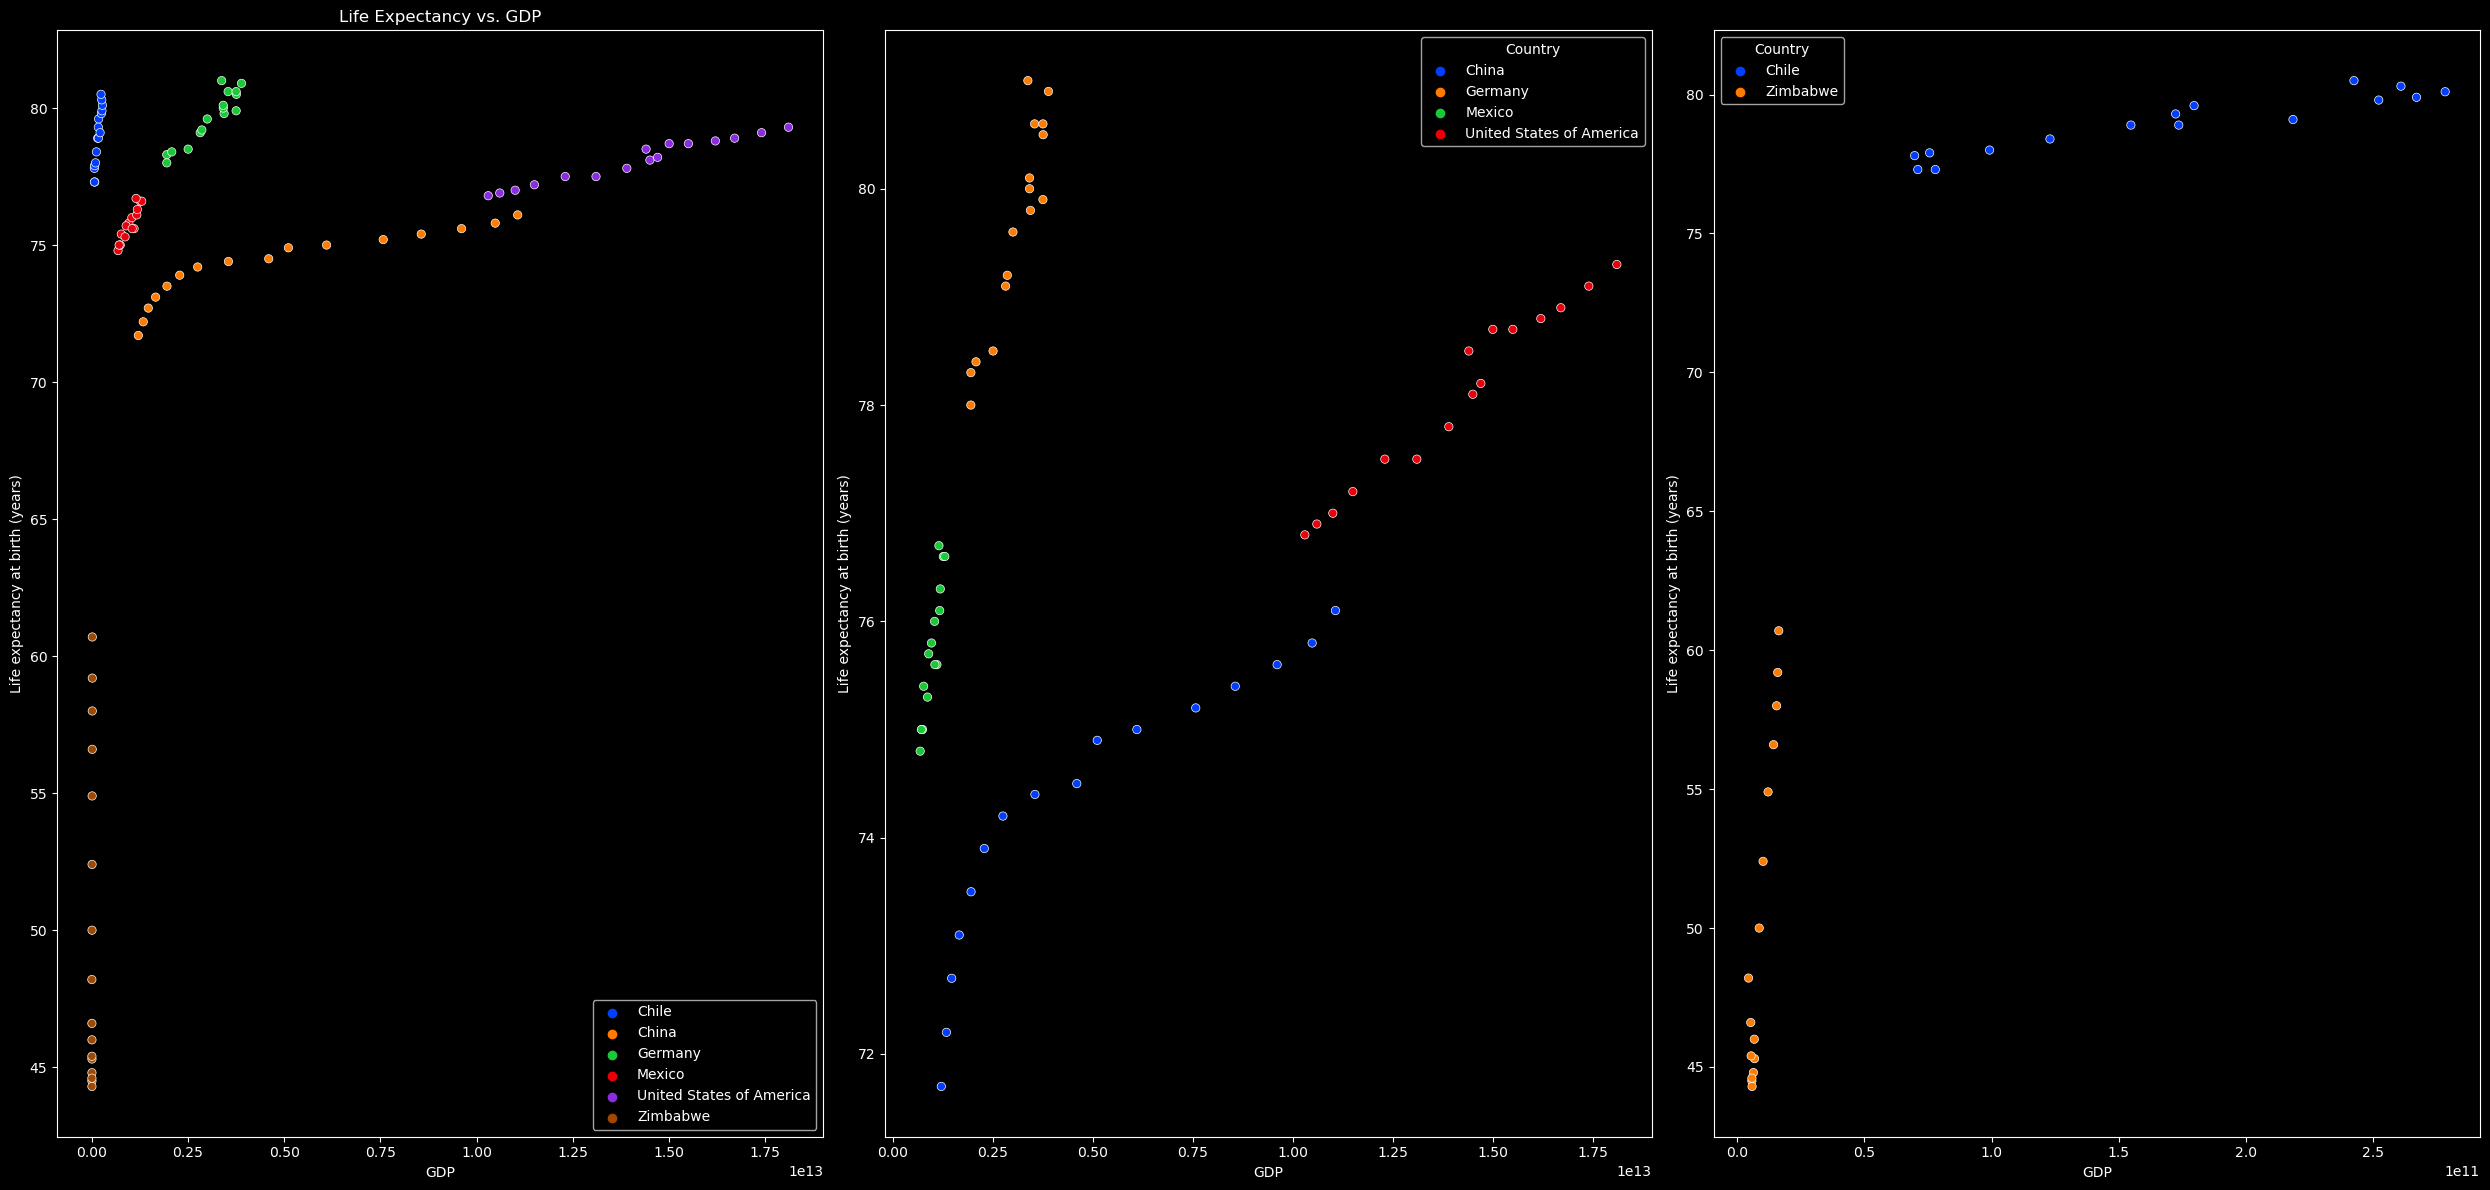

<Figure size 640x480 with 0 Axes>

In [7]:
# Create x-axis range based on range of data

min_gdp = min(life_expectancy['GDP'])
max_gdp = max(life_expectancy['GDP'])

# Set palette
sns.set_palette("bright")
plt.figure(figsize=(25,12))

# plot of all countries
plt.subplot(1,3,1)
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', hue= 'Country', data = life_expectancy)

plt.legend(loc=4)
plt.title('Life Expectancy vs. GDP')

# plot of all countries except Zimbabwe and Chile
plt.subplot(1,3,2)
plot_data = life_expectancy[(life_expectancy['Country'] != 'Zimbabwe') & (life_expectancy['Country'] != 'Chile')]
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', hue= 'Country', data = plot_data)

# plot of Zimbabwe and Chile
plt.subplot(1,3,3)
plot_data = life_expectancy[(life_expectancy['Country'] == 'Zimbabwe') | (life_expectancy['Country'] == 'Chile')]
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', hue= 'Country', data = plot_data)

plt.tight_layout()
plt.show()
plt.clf()

Text(0.5, 1.0, "Zimbabwe's GDP by Year")

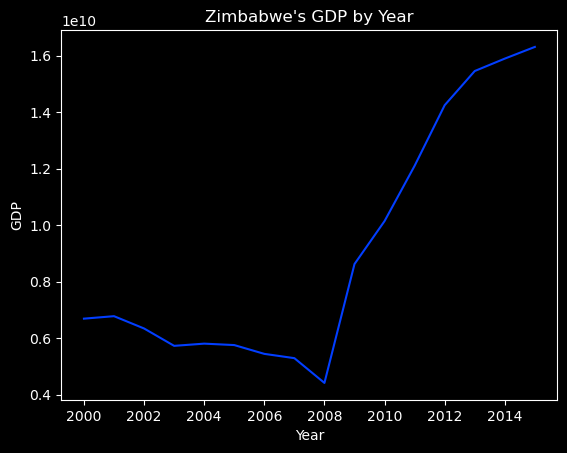

In [8]:
plot_data = life_expectancy[life_expectancy['Country'] == 'Zimbabwe']

sns.lineplot(x = 'Year', y = 'GDP', data= plot_data)
plt.title('Zimbabwe\'s GDP by Year')




/var/folders/fs/9zn9sfsx7z9fql4jfk82p5fc0000gn/T/ipykernel_14715/3867540847.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_expectancy.corr(), center=0, cmap=colors, robust=True)


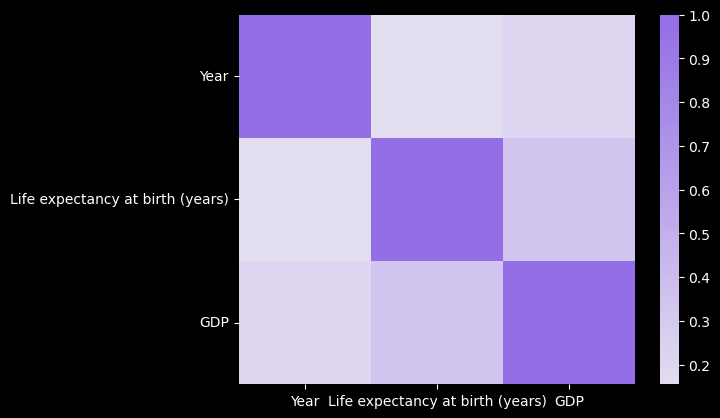

In [9]:
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(life_expectancy.corr(), center=0, cmap=colors, robust=True)
plt.show()

/var/folders/fs/9zn9sfsx7z9fql4jfk82p5fc0000gn/T/ipykernel_14715/4155403579.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(country_data.corr(), center=0, cmap=colors, robust=True)


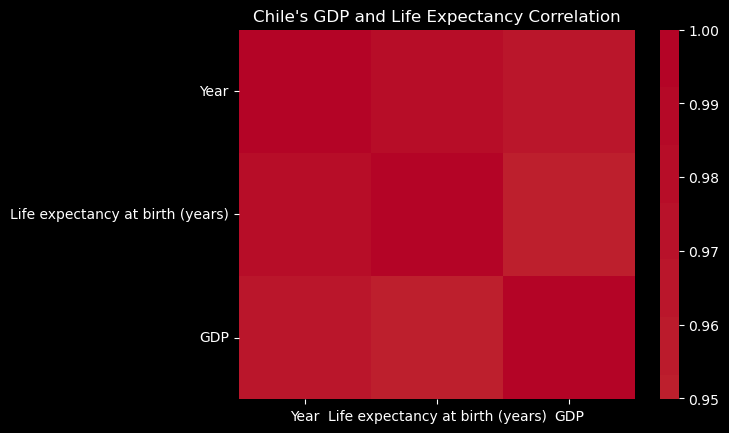

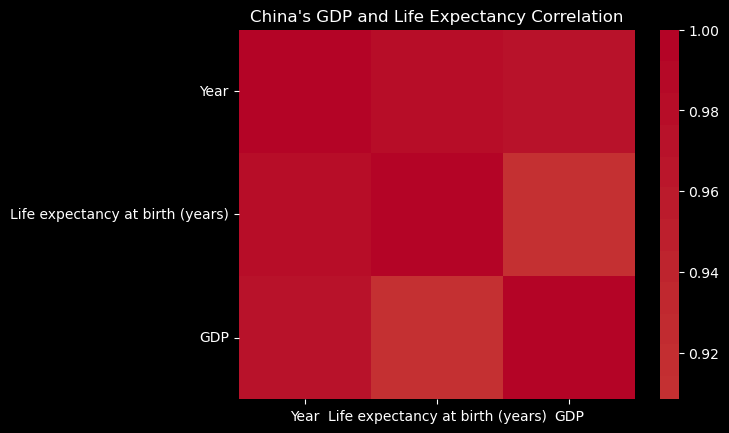

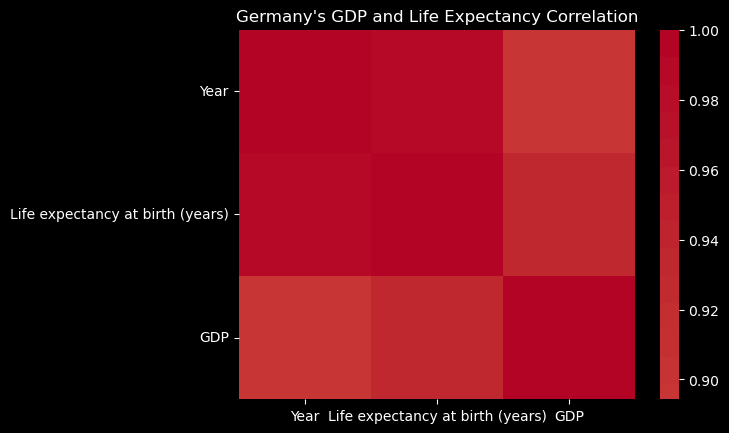

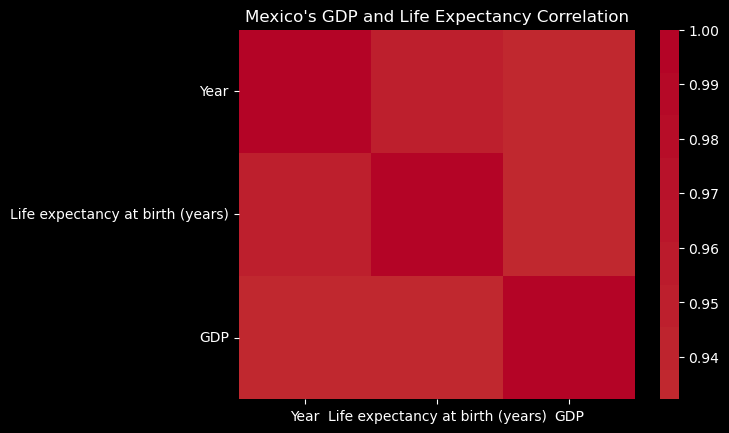

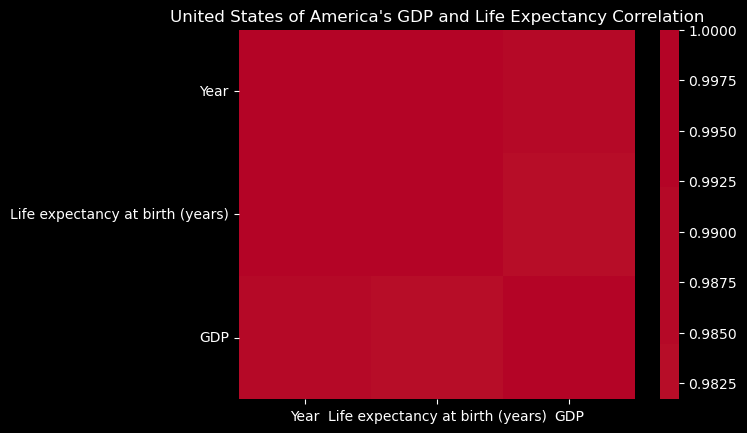

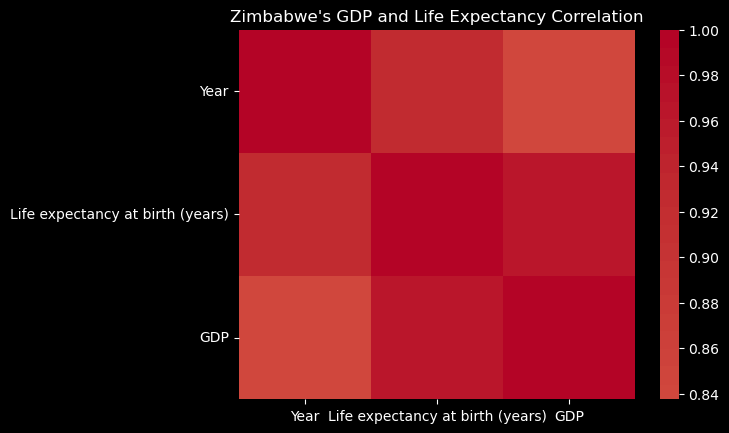

<Figure size 640x480 with 0 Axes>

In [10]:
#colors = sns.color_palette("RdYlBu", n_colors=10)
colors = sns.color_palette("coolwarm", as_cmap= True)

for country in unique_countries:
    country_data = life_expectancy[life_expectancy['Country'] == country]
    sns.heatmap(country_data.corr(), center=0, cmap=colors, robust=True)
    plt.title(str(country) + '\'s GDP and Life Expectancy Correlation')
    plt.show()
    plt.clf()


In [11]:
pearson_coefficients = {}

# Calculate Pearson coefficients for each country and apply them to a dictionary 
for country in unique_countries:
    pearson_data = life_expectancy[life_expectancy['Country'] == country]
    corr_GDP_lifeexpectancy, p = pearsonr(pearson_data['GDP'], pearson_data['Life expectancy at birth (years)'])
    pearson_coefficients[country] = corr_GDP_lifeexpectancy
    #pearson_coefficients.append(corr_GDP_lifeexpectancy)
    
# convert dictionary to dataframe
pearson_coefficients_df = pd.DataFrame(list(pearson_coefficients.items()), columns=['Country', 'Pearson Coefficient'])



/var/folders/fs/9zn9sfsx7z9fql4jfk82p5fc0000gn/T/ipykernel_14715/2735496376.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries_list_for_axis)


Text(0.5, 1.0, 'Correlation of GDP and Life Expectancy')

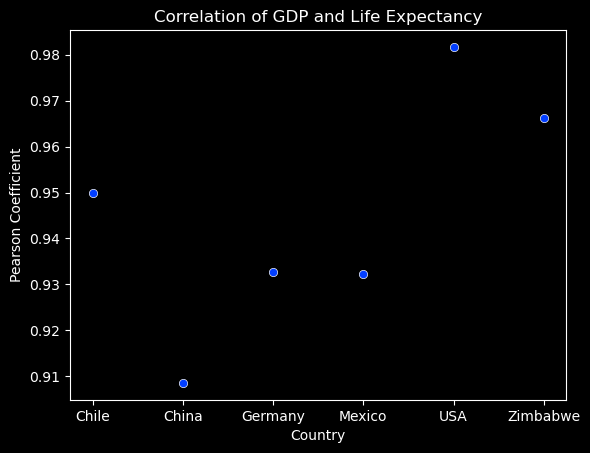

In [12]:
ax = sns.scatterplot(x = 'Country', y = 'Pearson Coefficient', data = pearson_coefficients_df)
ax.set_xticklabels(countries_list_for_axis)
plt.title('Correlation of GDP and Life Expectancy')